# Sonar   

## 데이터 인풋

In [1]:
import numpy as np
import pandas as pd

In [2]:
sonar = pd.read_csv("dataset/sonar.csv",header=None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
sonar.isnull().sum().sum()          # 데이터 결측 없음

0

### 데이터 전처리 

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_sonar = encoder.fit_transform(sonar.iloc[:,-1].values)

### 데이터셋 만들기 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sonar.iloc[:,:-1].values, y_sonar,
    stratify=y_sonar, random_state=2021)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 60), (52, 60), (156,), (52,))

### 모델 생성 / 학습 / 평가

In [6]:
import tensorflow as tf 

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- Model 1  
    60 / 30 / 10 / 1 , epoch : 100, batch_size : 30

In [8]:
model1 = Sequential()
model1.add(Dense(60,input_shape=(60,),activation="relu"))
model1.add(Dense(30,activation="relu"))
model1.add(Dense(10,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 5,811
Trainable params: 5,811
Non-trainable params: 0
_________________________________________________________________


In [9]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history1 = model1.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=100,
    batch_size=30,verbose=0)

In [10]:
model1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 997us/step - loss: 0.4579 - accuracy: 0.7885


[0.45786431431770325, 0.7884615659713745]

- Model 2  
    60 / 30 / 15 / 7 / 1 , epoch : 100, batch_size : 30

In [11]:
model2 = Sequential()
model2.add(Dense(60,input_shape=(60,),activation="relu"))
model2.add(Dense(30,activation="relu"))
model2.add(Dense(15,activation="relu"))
model2.add(Dense(7,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 8         
Total params: 6,075
Trainable params: 6,075
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=100,
    batch_size=30, verbose=0)

model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 999us/step - loss: 0.5022 - accuracy: 0.8462


[0.5021664500236511, 0.8461538553237915]

- Model 3  
    60 / 30 / 15 / 7 / 1 , epoch : 150, batch_size : 50

In [13]:
model3 = Sequential()
model3.add(Dense(60,input_shape=(60,),activation="relu"))
model3.add(Dense(30,activation="relu"))
model3.add(Dense(15,activation="relu"))
model3.add(Dense(7,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_11 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 8         
Total params: 6,075
Trainable params: 6,075
Non-trainable params: 0
_________________________________________________________________


In [14]:
model3.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history3 = model3.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=200,
    batch_size=30, verbose=0)

model3.evaluate(X_test,y_test)

2/2 [==============================] - 0s 999us/step - loss: 0.8028 - accuracy: 0.8462


[0.8027840852737427, 0.8461538553237915]

- Model 4  
    60 / 30 / 15 / 7 / 1 , epoch : 150, batch_size : 30, optimizer : rmsprop

In [15]:
model4 = Sequential()
model4.add(Dense(60,input_shape=(60,),activation="relu"))
model4.add(Dense(30,activation="relu"))
model4.add(Dense(15,activation="relu"))
model4.add(Dense(7,activation="relu"))
model4.add(Dense(1,activation="sigmoid"))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_15 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 8         
Total params: 6,075
Trainable params: 6,075
Non-trainable params: 0
_________________________________________________________________


In [16]:
model4.compile(
    loss = 'binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

history4 = model4.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=150,
    batch_size=30, verbose=0)

model4.evaluate(X_test,y_test)

2/2 [==============================] - 0s 499us/step - loss: 0.9209 - accuracy: 0.8077


[0.9208557605743408, 0.807692289352417]

- Model 5  
    120 / 60 / 30 / 1 , epoch : 200, batch_size : 50

In [17]:
model5 = Sequential()
model5.add(Dense(120,input_shape=(60,),activation="relu"))
model5.add(Dense(60,activation="relu"))
model5.add(Dense(30,activation="relu"))
model5.add(Dense(1,activation="sigmoid"))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 120)               7320      
_________________________________________________________________
dense_20 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_21 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 31        
Total params: 16,441
Trainable params: 16,441
Non-trainable params: 0
_________________________________________________________________


In [18]:
model5.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history5 = model5.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=200,
    batch_size=50, verbose=0)

model5.evaluate(X_test,y_test)

2/2 [==============================] - 0s 499us/step - loss: 0.6841 - accuracy: 0.8462


[0.6841493844985962, 0.8461538553237915]

- Model 6  
    120 / 80 / 40 / 20 / 1 , epoch : 200, batch_size : 50

In [19]:
model6 = Sequential()
model6.add(Dense(120,input_shape=(60,),activation="relu"))
model6.add(Dense(80,activation="relu"))
model6.add(Dense(40,activation="relu"))
model6.add(Dense(20,activation="relu"))
model6.add(Dense(1,activation="sigmoid"))
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 120)               7320      
_________________________________________________________________
dense_24 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_25 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_26 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 21        
Total params: 21,081
Trainable params: 21,081
Non-trainable params: 0
_________________________________________________________________


In [20]:
model6.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history6 = model6.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=200,
    batch_size=50, verbose=0)

model6.evaluate(X_test,y_test)

2/2 [==============================] - 0s 999us/step - loss: 0.9072 - accuracy: 0.8654


[0.907191812992096, 0.8653846383094788]

- Model 7  
    120 / 80 / 40 / 20 / 1 , epoch : 60, batch_size : 15, loss = 'mse'

In [21]:
model7 = Sequential()
model7.add(Dense(120,input_shape=(60,),activation="relu"))
model7.add(Dense(80,activation="relu"))
model7.add(Dense(40,activation="relu"))
model7.add(Dense(20,activation="relu"))
model7.add(Dense(1,activation="sigmoid"))
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 120)               7320      
_________________________________________________________________
dense_29 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_30 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_31 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 21        
Total params: 21,081
Trainable params: 21,081
Non-trainable params: 0
_________________________________________________________________


In [22]:
model7.compile(
    loss = 'mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

history7 = model7.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=60,
    batch_size=15, verbose=0)

model7.evaluate(X_test,y_test)

2/2 [==============================] - 0s 996us/step - loss: 0.0958 - accuracy: 0.8846


[0.09583728015422821, 0.8846153616905212]

### 데이터 시각화

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

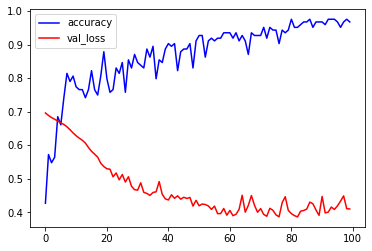

In [24]:
# Model1
y_acc = history1.history['accuracy']
y_vloss = history1.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()

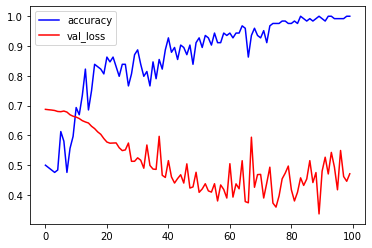

In [25]:
# Model2
y_acc = history2.history['accuracy']
y_vloss = history2.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()

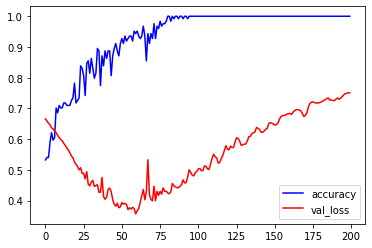

In [26]:
# Model3
y_acc = history3.history['accuracy']
y_vloss = history3.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()

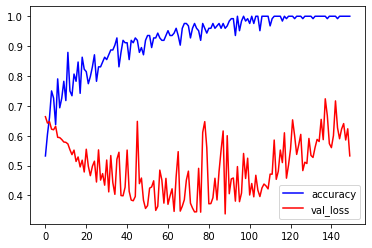

In [27]:
# Model4
y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()

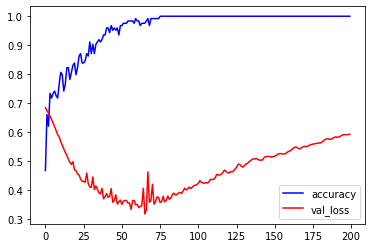

In [28]:
# Model5
y_acc = history5.history['accuracy']
y_vloss = history5.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()

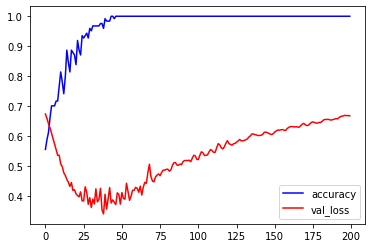

In [29]:
# Model6
y_acc = history6.history['accuracy']
y_vloss = history6.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()

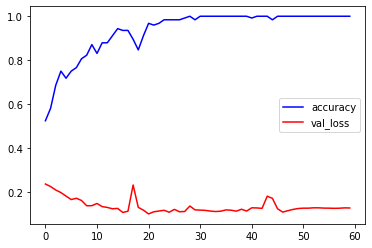

In [30]:
# Model7
y_acc = history7.history['accuracy']
y_vloss = history7.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()